<a href="https://colab.research.google.com/github/anagjurchinova/DataScience_2025/blob/main/Spotify_Songs_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Laboratory Exercise - Run Mode (8 points)

## The Spotify Songs Dataset
The dataset consists of information on more than 30,000 songs obtained from the Spotify API, with various musical features and genres. The features include danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and genre. Each feature provides insights into different aspects of the songs, such as danceability, intensity, loudness, presence of spoken words, acoustic nature, instrumental content, live performance likelihood, musical positiveness, tempo, and genre. All these features except 'genre' serve as input variables for potential analysis and modeling. The 'genre' attribute serves as the target variable, representing the song genre to be predicted. The dataset offers a comprehensive collection of attributes, making it suitable for exploring and understanding the musical characteristics of a diverse range of songs.

Load the dataset into a `pandas` data frame.

In [9]:
data = pd.read_csv('/content/sample_data/spotify_songs.csv')
data.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,pop
1,0.726,NaN,-4.969,0.0373,0.0724,NaN,0.3570,0.693,99.972,pop
2,0.675,0.931,-3.432,0.0742,0.0794,NaN,0.1100,0.613,124.008,pop
3,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,NaN,pop
4,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,pop


Preprocess the input and the output variables appropriately.

In [10]:
data['genre'].isnull().sum()

0

Explore the dataset using visualizations of your choice.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      29171 non-null  float64
 1   energy            21572 non-null  float64
 2   loudness          25213 non-null  float64
 3   speechiness       30472 non-null  float64
 4   acousticness      31939 non-null  float64
 5   instrumentalness  26363 non-null  float64
 6   liveness          29847 non-null  float64
 7   valence           25344 non-null  float64
 8   tempo             26276 non-null  float64
 9   genre             32833 non-null  object 
dtypes: float64(9), object(1)
memory usage: 2.5+ MB


In [15]:
def visualize(data, columns):
  plt.figure(figsize=(14,4))
  for i in range(len(columns)):
    plt.subplot(1, len(columns), i+1)
    plt.hist(data[columns[i]], bins=15)
    plt.title(columns[i])

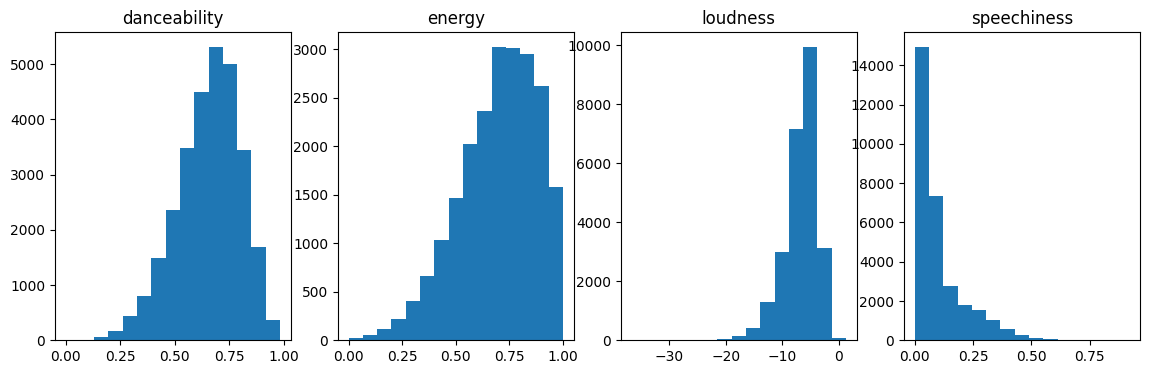

In [16]:
visualize(data, ['danceability', 'energy', 'loudness', 'speechiness'])
# Not normally distributed, danceablity, energy, loudness are left skewed (mean < median), speechiness is right skewed (mean > median).

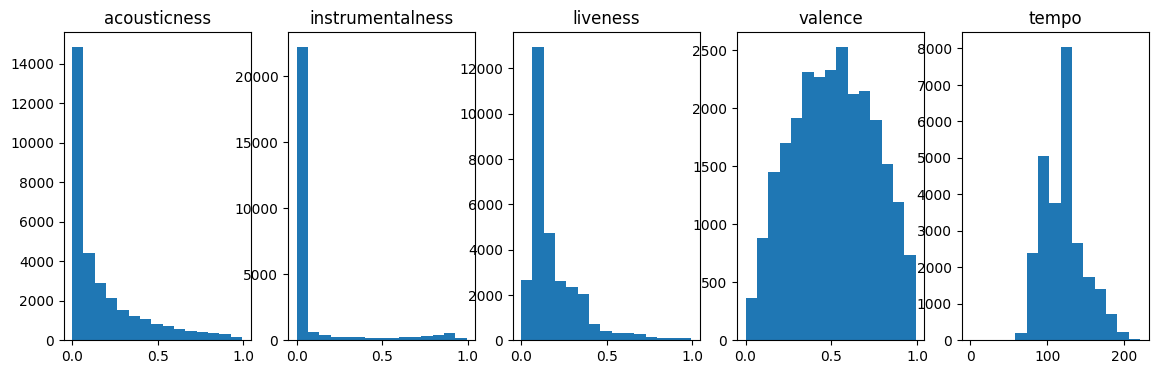

In [19]:
visualize(data, ['acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'])
# Only valence is close to a normal distribution, but still not normally distributed

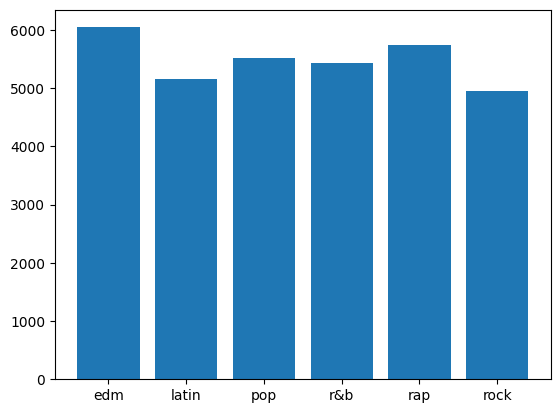

In [21]:
genre_counts = data.groupby('genre').size()
plt.bar(genre_counts.index, genre_counts)
plt.show()

Check if the dataset is balanced.

In [6]:
data['genre'].value_counts()
# The dataset is not balanced

,count
genre,
edm,6043
rap,5746
pop,5507
r&b,5431
latin,5155
rock,4951


## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [22]:
data.isnull().mean() * 100

,0
danceability,11.153413
energy,34.297810
loudness,23.208357
speechiness,7.190936
acousticness,2.722870
instrumentalness,19.705784
liveness,9.094509
valence,22.809369
tempo,19.970761
genre,0.000000


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

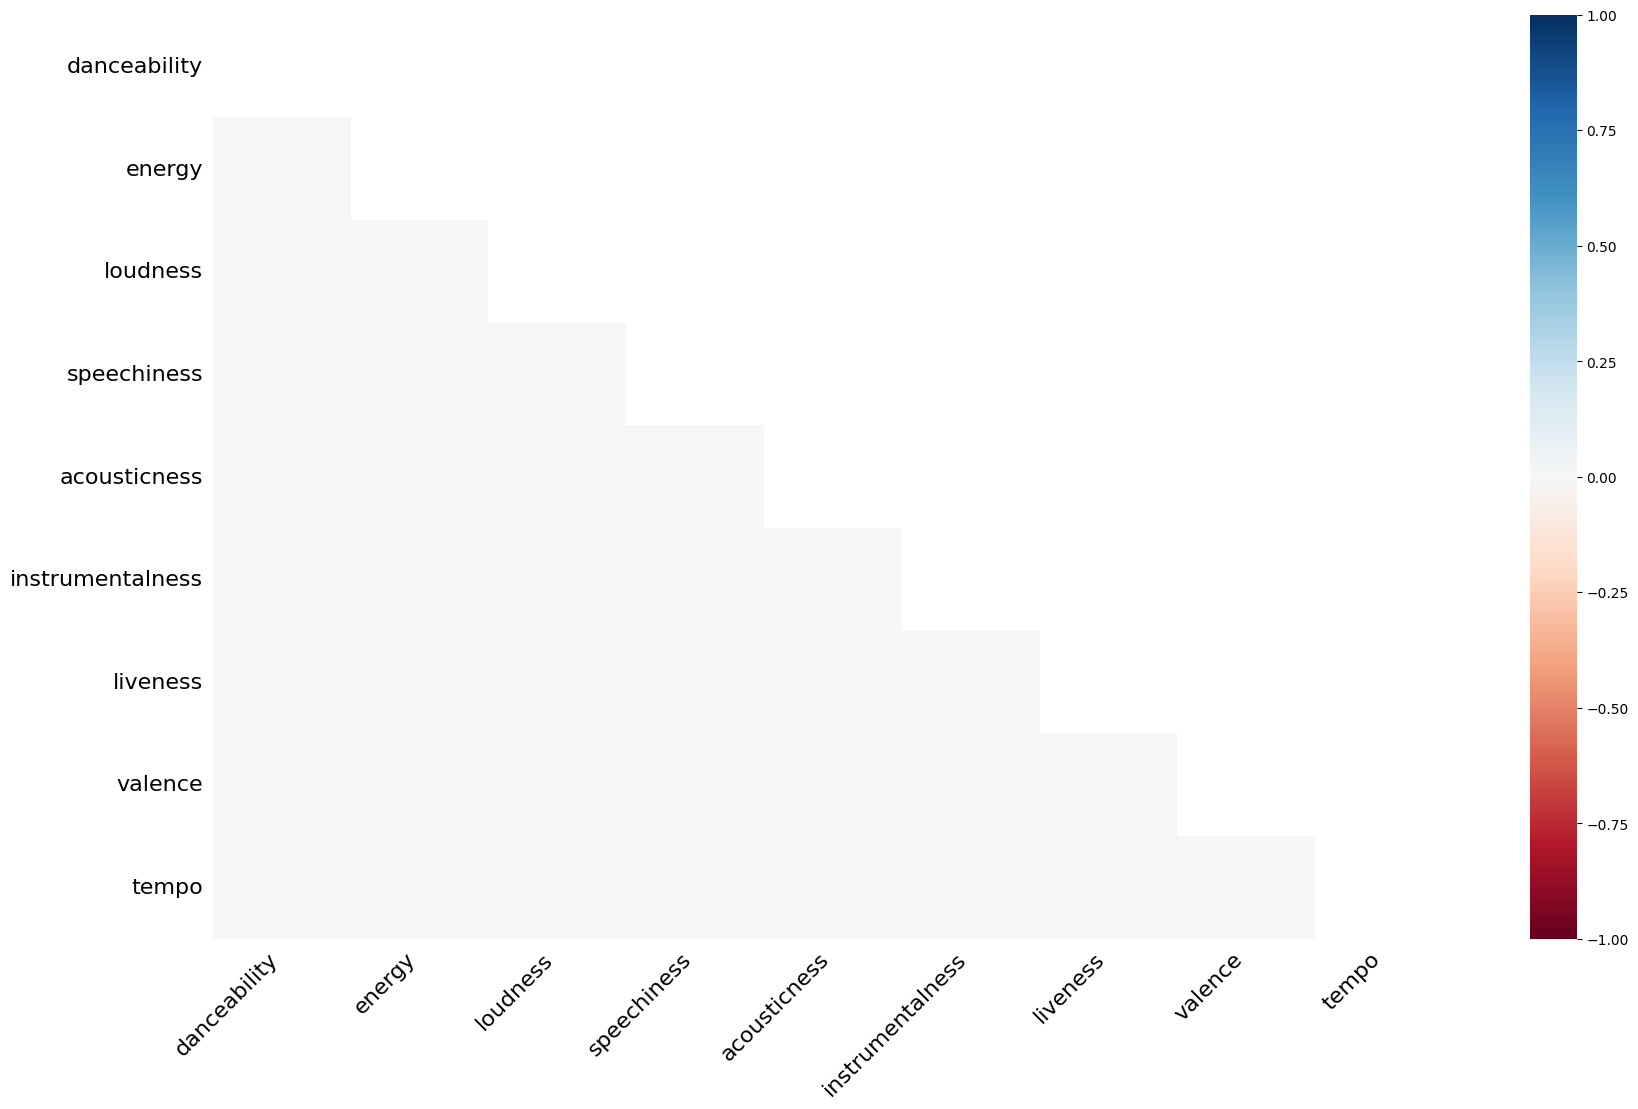

In [24]:
msno.heatmap(data)
plt.show()
# None of the missing values are correlated

In [26]:
data = data.dropna(subset=['acousticness'], axis=0)
data.isnull().mean() * 100

,0
danceability,11.165033
energy,34.302890
loudness,23.209869
speechiness,7.204358
acousticness,0.000000
instrumentalness,19.737625
liveness,9.092332
valence,22.793450
tempo,20.000626
genre,0.000000


## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [35]:
def impute(data, columns, imputingStrategy):
  data_copy = data.copy()
  imputer = SimpleImputer(strategy = imputingStrategy)
  for column in columns:
    data_copy[column] = imputer.fit_transform(data_copy[[column]]).flatten()

  return data_copy

In [41]:
data_copy = impute(data, ['speechiness', 'liveness', 'danceability'], 'median')
data_copy.isnull().mean() * 100

,0
danceability,0.000000
energy,34.302890
loudness,23.209869
speechiness,0.000000
acousticness,0.000000
instrumentalness,19.737625
liveness,0.000000
valence,22.793450
tempo,20.000626
genre,0.000000


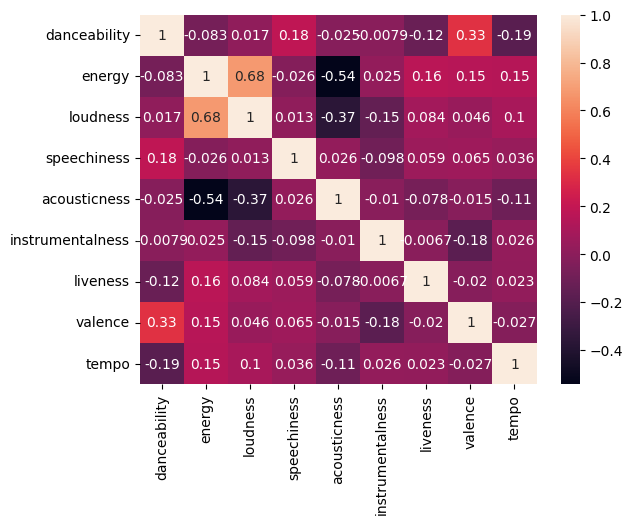

In [37]:
sns.heatmap(data[data.columns[:-1]].corr(), annot=True)
plt.show()

In [42]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_copy[['loudness', 'energy']])
knn_imputer = KNNImputer(n_neighbors=9)
imputed_data = knn_imputer.fit_transform(scaled_data)
data_copy[['loudness', 'energy']] = imputed_data

data_copy.isnull().mean() * 100

,0
danceability,0.000000
energy,0.000000
loudness,0.000000
speechiness,0.000000
acousticness,0.000000
instrumentalness,19.737625
liveness,0.000000
valence,22.793450
tempo,20.000626
genre,0.000000


In [49]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_copy[['instrumentalness', 'valence', 'tempo']])
knn_imputer = KNNImputer(n_neighbors=9)
imputed_data = knn_imputer.fit_transform(scaled_data)
data_copy[['instrumentalness', 'valence', 'tempo']] = imputed_data

data_copy.isnull().mean() * 100

,0
danceability,0.0
energy,0.0
loudness,0.0
speechiness,0.0
acousticness,0.0
instrumentalness,0.0
liveness,0.0
valence,0.0
tempo,0.0
genre,0.0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data_copy[data_copy.columns[:-1]], data_copy[data_copy.columns[-1]], test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [ ]:
# DT model does not require Scaling.

## Model Selection

Choose and train an approriate model for the given task.

In [51]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

Use the trained model to make predictions for the test set.

In [52]:
predictions = clf.predict(X_test)

Assess the performance of the model by using different classification metrics.

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[553 135 192 112 112 111]
 [131 308 158 152 178  85]
 [229 176 269 165 123 169]
 [101 163 189 266 201 101]
 [105 171 123 234 411  63]
 [ 63  80 160 110  44 445]]
              precision    recall  f1-score   support

         edm       0.47      0.46      0.46      1215
       latin       0.30      0.30      0.30      1012
         pop       0.25      0.24      0.24      1131
         r&b       0.26      0.26      0.26      1021
         rap       0.38      0.37      0.38      1107
        rock       0.46      0.49      0.47       902

    accuracy                           0.35      6388
   macro avg       0.35      0.35      0.35      6388
weighted avg       0.35      0.35      0.35      6388



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data_copy[data_copy.columns[:-1]], data_copy[data_copy.columns[-1]], test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [ ]:
# DT model does not require scaling.

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [60]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf' : [10, 50, 70, 100, 1000],
    'max_depth' : [3, 5, 10]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, Y_train)
print(f'Best params: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50}
Best score: 0.42376065402678725


## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [63]:
model = grid_search.best_estimator_
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[327  42  87  24  39  47]
 [ 38 166 102  59  94  28]
 [ 82  89 159  78  48  87]
 [ 43  70  81 164 134  62]
 [ 59  55  50  71 302  23]
 [ 56  23  56  49  18 282]]
              precision    recall  f1-score   support

         edm       0.54      0.58      0.56       566
       latin       0.37      0.34      0.36       487
         pop       0.30      0.29      0.29       543
         r&b       0.37      0.30      0.33       554
         rap       0.48      0.54      0.51       560
        rock       0.53      0.58      0.56       484

    accuracy                           0.44      3194
   macro avg       0.43      0.44      0.43      3194
weighted avg       0.43      0.44      0.43      3194

